# LMNA

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.2.1.dev0


In [2]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort_name = 'LMNA'
phenopacket_store_release = '0.1.19'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()

Patients Created: 100%|██████████| 127/127 [00:00<00:00, 341.23it/s]
Validated under none policy
No errors or warnings were found


## Transcript
Get it by looking for gene symbol in https://www.ncbi.nlm.nih.gov/clinvar/ look for pathogenic
zcopy it and go to https://variantvalidator.org/service/validate/, then scroll down to copy GRCH38 string, copy this and put into same website

looking for MANE select plus clinical (most important transcript for clinic) if doesnt exist, use clinvar result

In [3]:
LMNA_MANE_transcript = 'NM_170707.4'
LMNA_protein_id = 'NP_005563.1'

## Explore Cohort

In [4]:
from gpsea.view import CohortViewable
from IPython.display import HTML, display

viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=LMNA_MANE_transcript)))

HPO Term,ID,Seen in n individuals
Ankle contracture,HP:0034677,39
Elbow contracture,HP:0034391,37
Spinal rigidity,HP:0003306,37
Stiff neck,HP:0025258,36
Proximal muscle weakness in upper limbs,HP:0008997,35
Dilated cardiomyopathy,HP:0001644,27
Atrial fibrillation,HP:0005110,25
Arrhythmia,HP:0011675,23
Lipodystrophy,HP:0009125,21
Proximal muscle weakness in lower limbs,HP:0008994,21


In [5]:
from gpsea.preprocessing import configure_protein_metadata_service
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.model.genome import GRCh38

pms = configure_protein_metadata_service()
protein_meta = pms.annotate(LMNA_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(LMNA_MANE_transcript)

In [6]:
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [7]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Interaction with MLIP,region,1 - 130,26
Head,region,1 - 33,7
Disordered,region,1 - 25,6
IF rod,domain,31 - 387,67
Coil 1A,region,34 - 70,13
Linker 1,region,71 - 80,0
Coil 1B,region,81 - 218,25
Linker 2,region,219 - 242,5
Coil 2,region,243 - 383,19
Necessary and sufficient for the interaction with IFFO1,region,259 - 331,8


<Axes: title={'center': 'Prelamin-A/C\ntranscript: NM_170707.4, protein: NP_005563.1'}>

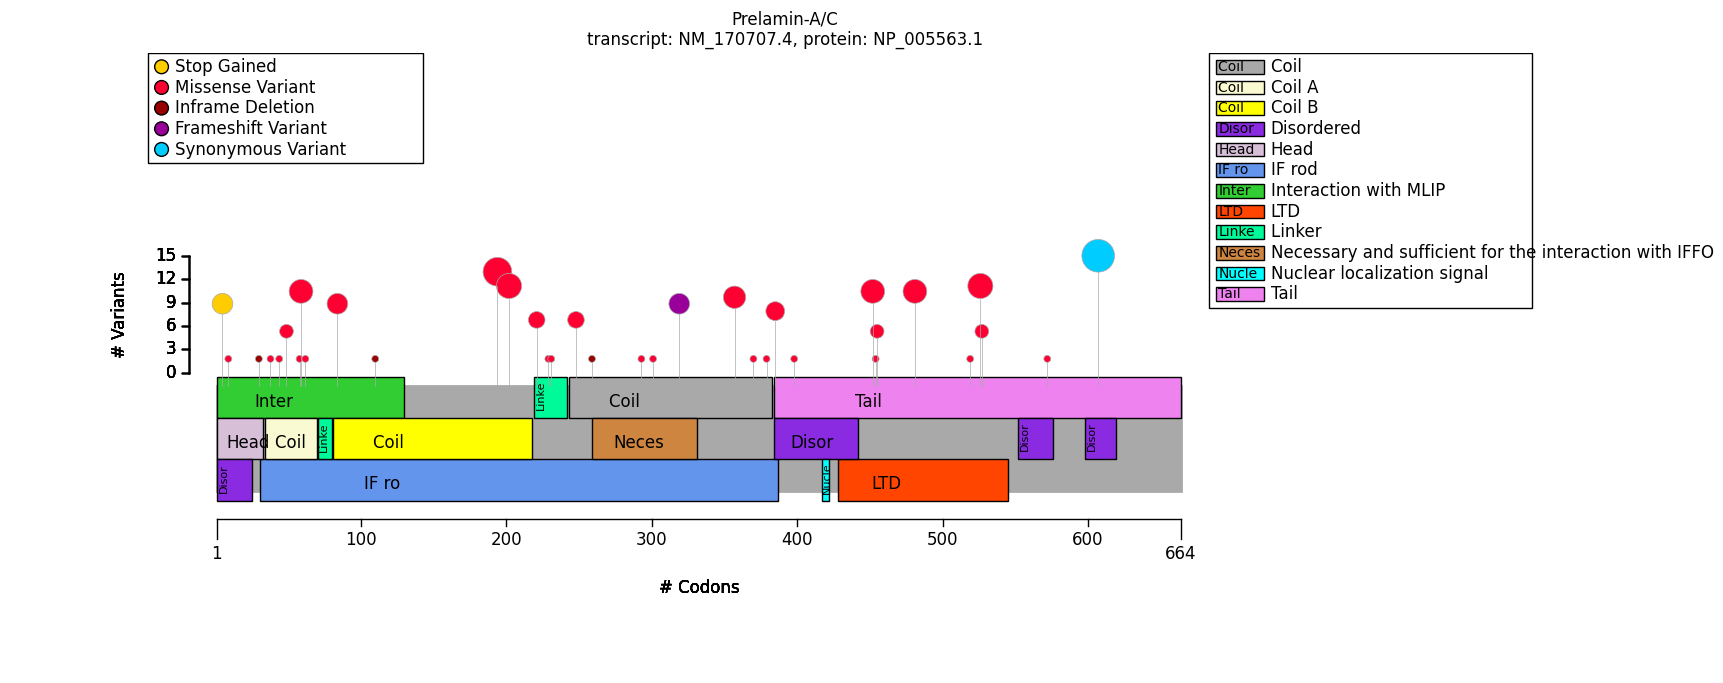

In [8]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Configure the analysis

In [9]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.hpo_mtc_strategy()

analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)


In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import PatientCategories
from gpsea.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, LMNA_MANE_transcript)
by_missense = analysis.compare_hpo_vs_genotype(is_missense)
by_missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_170707.4                       Yes             No  \
                                                    Count Percent  Count   
Lipodystrophy [HP:0009125]                          10/75     13%  15/35   
Alopecia [HP:0001596]                                 0/3      0%  15/15   
Prominent superficial blood vessels [HP:0007394]      0/3      0%  15/15   
Reduced subcutaneous adipose tissue [HP:0003758]      0/3      0%  15/15   
Proptosis [HP:0000520]                                0/3      0%  15/15   
Failure to thrive [HP:0001508]                        0/3      0%  15/15   
Micrognathia [HP:0000347]                             0/3      0%  15/15   
Short stature [HP:0004322]                            1/4     25%  15/15   
Reduced bone mineral density [HP:0004349]             2/5     40%  15/15   
Increased circulating creatine kinase MM isofor...    0/4      0%    3/3   
Left ventricular systolic dysfunction [HP:0025169]   2/25      8%    3/7   
Abnormal left ventricular ejection fraction [HP...   2/25      8%    3/7   
Reduced left ventricular ejection fraction [HP:...   2/29      7%    3/8   
Respiratory insufficiency due to muscle weaknes...  11/13     85%    0/2   
Abnormal left ventricular function [HP:0005162]      8/31     26%   6/10   
Abnormal atrioventricular conduction [HP:0005150]   26/26    100%   9/11   
Cardiac conduction abnormality [HP:0031546]         26/26    100%  10/12   
Mildly reduced left ventricular ejection fracti...   1/28      4%    2/7   
Ventricular tachycardia [HP:0004756]                 1/13      8%    2/4   
Sudden cardiac death [HP:0001645]                   11/21     52%    1/7   
Dilated cardiomyopathy [HP:0001644]                 23/35     66%    4/9   
Atrial fibrillation [HP:0005110]                    21/32     66%    4/9   
Tube feeding [HP:0033454]                            2/13     15%    1/2   
Highly elevated creatine kinase [HP:0030234]        15/36     42%    1/6   
Heart block [HP:0012722]                              8/8    100%   9/11   
Talipes [HP:0001883]                                 6/16     38%    0/2   
Abnormal circulating creatine kinase concentrat...  25/29     86%    9/9   
Loss of ambulation [HP:0002505]                      9/16     56%    1/3   
Second degree atrioventricular block [HP:0011706]     3/6     50%    3/5   
Decreased fetal movement [HP:0001558]                3/13     23%    0/2   
Neck muscle weakness [HP:0000467]                   10/13     77%    2/2   
Third degree atrioventricular block [HP:0001709]      2/5     40%    3/5   
Atrioventricular block [HP:0001678]                  8/11     73%   8/10   
Talipes equinovarus [HP:0001762]                     3/13     23%    0/2   
Cardiomyopathy [HP:0001638]                         24/27     89%    4/4   

MISSENSE_VARIANT on NM_170707.4                                       \
                                                   Percent   p value   
Lipodystrophy [HP:0009125]                             43%  0.001167   
Alopecia [HP:0001596]                                 100%  0.001225   
Prominent superficial blood vessels [HP:0007394]      100%  0.001225   
Reduced subcutaneous adipose tissue [HP:0003758]      100%  0.001225   
Proptosis [HP:0000520]                                100%  0.001225   
Failure to thrive [HP:0001508]                        100%  0.001225   
Micrognathia [HP:0000347]                             100%  0.001225   
Short stature [HP:0004322]                            100%  0.004128   
Reduced bone mineral density [HP:0004349]             100%  0.008772   
Increased circulating creatine kinase MM isofor...    100%  0.028571   
Left ventricular systolic dysfunction [HP:0025169]     43%  0.056591   
Abnormal left ventricular ejection fraction [HP...     43%  0.056591   
Reduced left ventricular ejection fraction [HP:...     38%  0.056945   
Respiratory insufficiency due to muscle weaknes...      0%  0.057143   
Abnormal left ventricular function 

In [12]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False

analysis_nomtc = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [13]:
by_dis = analysis_nomtc.compare_disease_vs_genotype(is_missense)
by_dis.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_170707.4    Yes             No                        \
                                 Count Percent  Count Percent       p value   
OMIM:176670                       0/90      0%  15/37     41%  8.025624e-10   
OMIM:151660                      12/90     13%   0/37      0%  1.807470e-02   
OMIM:181350                      34/90     38%   7/37     19%  5.904112e-02   
OMIM:613205                      13/90     14%   2/37      5%  2.276691e-01   
OMIM:115200                      31/90     34%  13/37     35%  1.000000e+00   

MISSENSE_VARIANT on NM_170707.4                    
                                Corrected p value  
OMIM:176670                          4.012812e-09  
OMIM:151660                          9.037348e-02  
OMIM:181350                          2.952056e-01  
OMIM:613205                          1.000000e+00  
OMIM:115200                          1.000000e+00

In [ ]:
is_var_key = VariantPredicates.variant_key('1_156138613_156138613_C_T')
by_var = analysis.compare_hpo_vs_genotype(is_var_key)
by_var.summarize(hpo, PatientCategories.YES)

variant has ID of 1_156138613_156138613_C_T         Yes             No  \
                                                  Count Percent  Count   
Lipodystrophy [HP:0009125]                        15/15    100%  10/95   
Prominent superficial blood vessels [HP:0007394]  15/15    100%    0/3   
Reduced subcutaneous adipose tissue [HP:0003758]  15/15    100%    0/3   
Proptosis [HP:0000520]                            15/15    100%    0/3   
Micrognathia [HP:0000347]                         15/15    100%    0/3   
Failure to thrive [HP:0001508]                    15/15    100%    0/3   
Alopecia [HP:0001596]                             15/15    100%    0/3   
Short stature [HP:0004322]                        15/15    100%    1/4   
Reduced bone mineral density [HP:0004349]         15/15    100%    2/5   

variant has ID of 1_156138613_156138613_C_T                             \
                                                 Percent       p value   
Lipodystrophy [HP:0009125]                           11%  2.780126e-12   
Prominent superficial blood vessels [HP:0007394]      0%  1.225490e-03   
Reduced subcutaneous adipose tissue [HP:0003758]      0%  1.225490e-03   
Proptosis [HP:0000520]                                0%  1.225490e-03   
Micrognathia [HP:0000347]                             0%  1.225490e-03   
Failure to thrive [HP:0001508]                        0%  1.225490e-03   
Alopecia [HP:0001596]                                 0%  1.225490e-03   
Short stature [HP:0004322]                           25%  4.127967e-03   
Reduced bone mineral density [HP:0004349]            40%  8.771930e-03   

variant has ID of 1_156138613_156138613_C_T                         
                                                 Corrected p value  
Lipodystrophy [HP:0009125]                            2.502113e-11  
Prominent superficial blood vessels [HP:0007394]      1.102941e-02  
Reduced subcutaneous adipose tissue [HP:0003758]      1.102941e-02  
Proptosis [HP:0000520]                                1.102941e-02  
Micrognathia [HP:0000347]                             1.102941e-02  
Failure to thrive [HP:0001508]                        1.102941e-02  
Alopecia [HP:0001596]                                 1.102941e-02  
Short stature [HP:0004322]                            3.715170e-02  
Reduced bone mineral density [HP:0004349]             7.894737e-02